<a href="https://colab.research.google.com/github/Anish-AV/Autoencoder/blob/master/Reconstruct_corrupted_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RECONSTRUCTING CORRUPTED TEXT USING AUTOENCODER**

In [0]:
import os
from pathlib import Path
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
from sklearn.model_selection import train_test_split
np.random.seed(111)
import tensorflow as tf


In [0]:
#Defining the loss function
def root_mean_squared_error(preds, real):
        return tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(preds, real))))

In [96]:
#importing the dataset
train_images=glob.glob("train/*.png")
train_labels=glob.glob("train_cleaned/*.png")
sample_test_img=glob.glob("test/*.png")


X = []
Y = []
test =[]

for img in train_images:
    img = load_img(img,grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(img,grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in sample_test_img:
    img = load_img(img,grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    test.append(img)

X = np.array(X)
Y = np.array(Y)
test=np.array(test)

print("Size of X : ", X.shape)
print("Size of Y : ", Y.shape)
print("Size of test : ", test.shape)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Size of X :  (144, 420, 540, 1)
Size of Y :  (144, 420, 540, 1)
Size of test :  (72, 420, 540, 1)
Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)


## **BASIC CNN MODEL**

Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 420, 540, 16)      160       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 210, 270, 16)      0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 210, 270, 8)       1160      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 105, 135, 8)       0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 105, 135, 8)       584       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 53, 68, 8)         0  

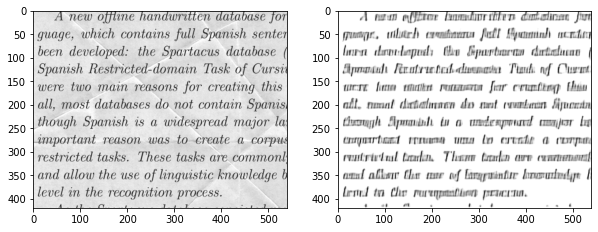

In [97]:
#Building our autoencoder
def build_autoenocder():
    input_img = tf.keras.layers.Input(shape=(420, 540, 1)) # adapt this if using `channels_first` image data format
    
    
    x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

    # at this point the representation is (4, 4, 8) i.e. 128-dimensional

    x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


    autoencoder = tf.keras.models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss=root_mean_squared_error)
    return autoencoder
autoencoder = build_autoenocder()
autoencoder.summary()

# Train your model
autoencoder.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_valid, y_valid))
predicted_label = autoencoder.predict(test)
f, ax = plt.subplots(1,2, figsize=(10,10))

ax[0].imshow(np.squeeze(test[1]),cmap='gray')
ax[1].imshow(np.squeeze(predicted_label[1]),cmap='gray')
plt.show()

## **CNN COMPLEX MODEL 1**

Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 420, 540, 16)      160       
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 420, 540, 8)       1160      
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 210, 270, 8)       0         
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 210, 270, 8)       584       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 105, 135, 8)       0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 105, 135, 8)       584

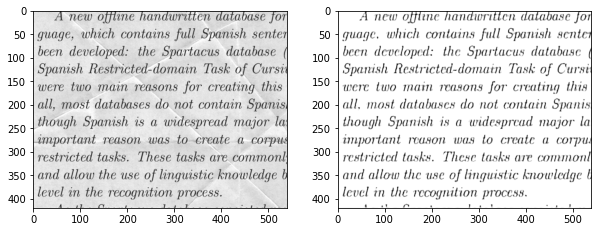

In [101]:
#Building our autoencoder
def build_autoenocder():
    input_img = tf.keras.layers.Input(shape=(420, 540, 1)) # adapt this if using `channels_first` image data format
    
    
    x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    #x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

    # at this point the representation is (4, 4, 8) i.e. 128-dimensional

    x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu',padding='same')(x)
    #x = tf.keras.layers.UpSampling2D((2, 2))(x)
    decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


    autoencoder = tf.keras.models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss=root_mean_squared_error)
    return autoencoder
autoencoder = build_autoenocder()
autoencoder.summary()

# Train your model
autoencoder.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_valid, y_valid))
predicted_label = autoencoder.predict(test)
f, ax = plt.subplots(1,2, figsize=(10,10))

ax[0].imshow(np.squeeze(test[1]),cmap='gray')
ax[1].imshow(np.squeeze(predicted_label[1]),cmap='gray')
plt.show()